# EDA Black Friday Dataset

### The Black Friday Dataset records the shopping behaviour of consumers of all age, gender, occupation, marital status and city. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Black Friday Dataset.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.isnull().sum()
# Missing values detected in 'Product_Category_2' and 'Product_Category_3'

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df[df.duplicated()]
# no duplicates found

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [6]:
df.drop(['User_ID','Product_ID'], axis = 1, inplace = True)
# Even though User_ID is not required, it is used to detect duplicates

In [7]:
gender_map = {'M':0,'F':1}
df['Gender'] = df['Gender'].map(gender_map)

age_map = {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
df['Age']=df['Age'].map(age_map)

city_cat_map = {'A':0,'B':1,'C':2}
df['City_Category'] = df['City_Category'].map(city_cat_map)

stay_in_city = {'0':0,'1':1,'2':2,'3':3,'4+':4}
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map(stay_in_city)
#encoding

In [8]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,NaN,NaN,8370
1,1,0,10,0,2,0,1,6.0,14.0,15200
2,1,0,10,0,2,0,12,NaN,NaN,1422
3,1,0,10,0,2,0,12,14.0,NaN,1057
4,0,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,0,5,13,1,1,1,20,NaN,NaN,368
550064,1,2,1,2,3,0,20,NaN,NaN,371
550065,1,2,15,1,4,1,20,NaN,NaN,137
550066,1,6,1,2,2,0,20,NaN,NaN,365


In [9]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
# filling missing values in 'product_category_2' and 'product_category_3' with 0
# assuming no purchases were made

In [10]:
df['Product_Category_2'] = df['Product_Category_2'].astype(int)
df['Product_Category_3'] = df['Product_Category_3'].astype(int)
# converting the datatype from float to int

In [11]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,0,2,0,3,0,0,8370
1,1,0,10,0,2,0,1,6,14,15200
2,1,0,10,0,2,0,12,0,0,1422
3,1,0,10,0,2,0,12,14,0,1057
4,0,6,16,2,4,0,8,0,0,7969
...,...,...,...,...,...,...,...,...,...,...
550063,0,5,13,1,1,1,20,0,0,368
550064,1,2,1,2,3,0,20,0,0,371
550065,1,2,15,1,4,1,20,0,0,137
550066,1,6,1,2,2,0,20,0,0,365


<Axes: >

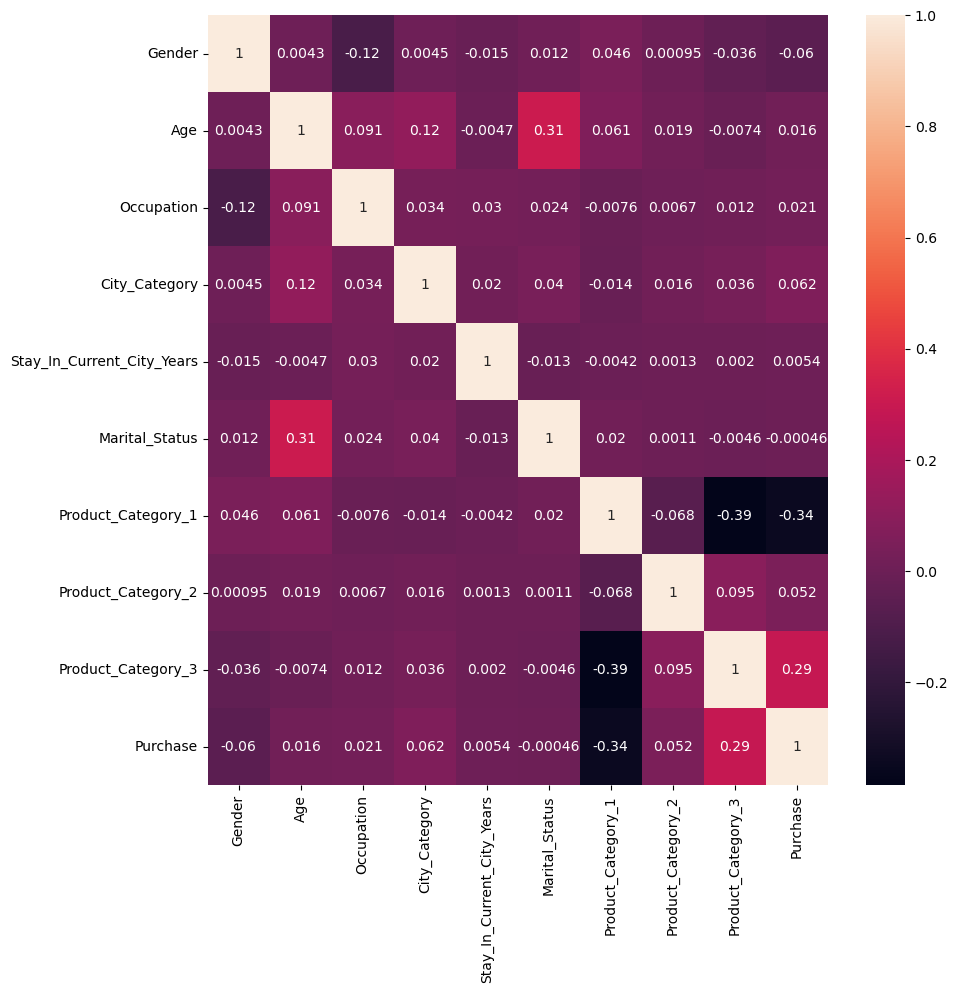

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

# correlation between numeric features

# Visualization

<Axes: xlabel='Gender', ylabel='count'>

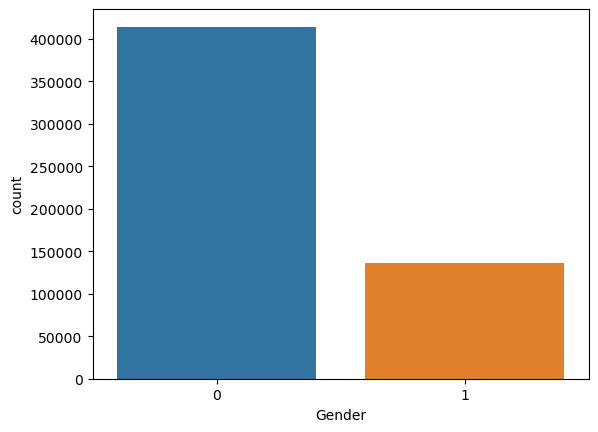

In [16]:
sns.countplot(data = df, x = 'Gender')

# gender_map = {'M':0,'F':1}
# Clearly Men are more shopaholics than Women

<Axes: xlabel='Age', ylabel='count'>

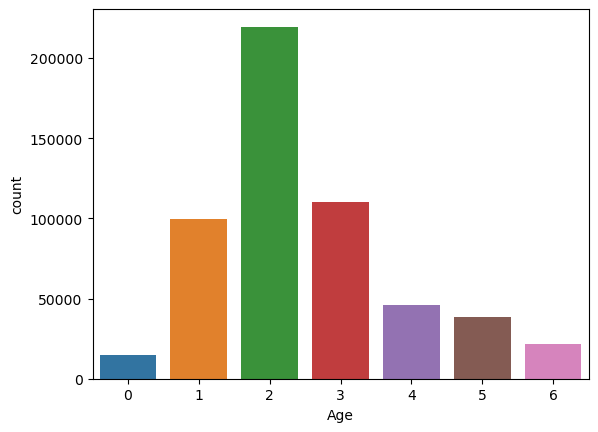

In [18]:
sns.countplot(data = df, x = 'Age')

# age_map = {'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
# people between ages 26-35 made most of the purchases

<Axes: xlabel='Occupation', ylabel='count'>

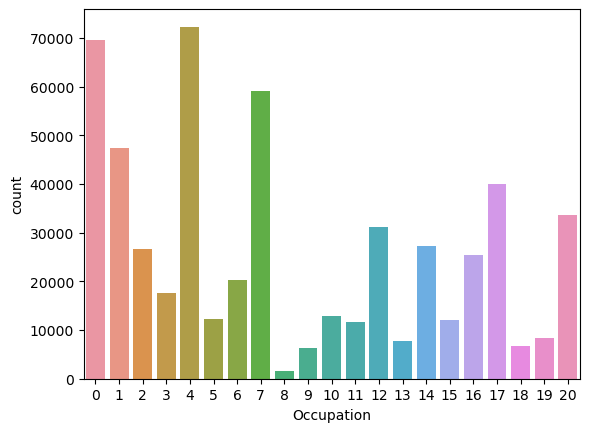

In [30]:
sns.countplot(data = df, x = 'Occupation')

# Although it is not mentioned what the occupation labels mean, '4' wins the category

<Axes: xlabel='Age', ylabel='Purchase'>

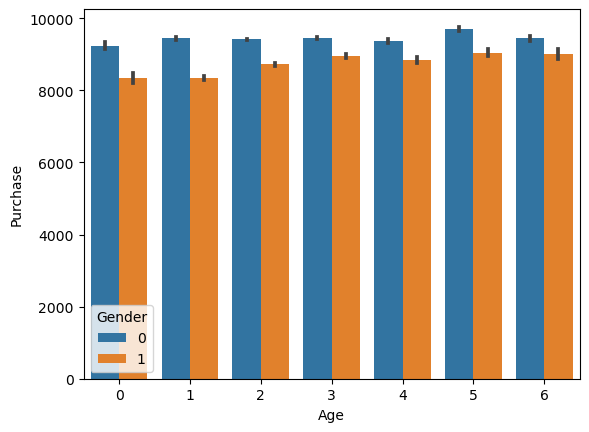

In [23]:
sns.barplot(y = 'Purchase',x = 'Age',hue = 'Gender', data = df)

# Across all ages, men are the best deal grabers

<Axes: xlabel='Occupation', ylabel='Purchase'>

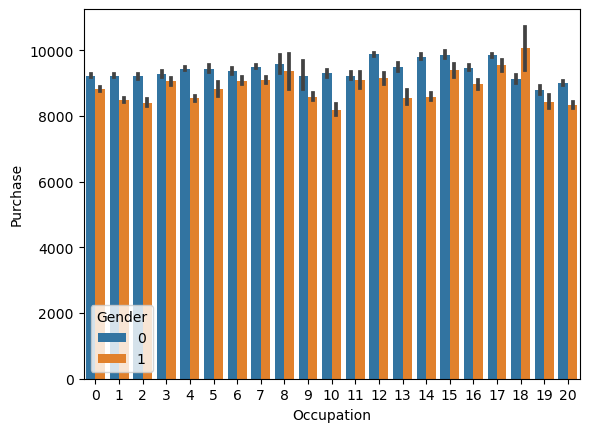

In [24]:
sns.barplot(y = 'Purchase',x = 'Occupation',hue = 'Gender', data = df)

# A slight dip in men's statistic, with women leading in the shopping category for occupation label 18

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

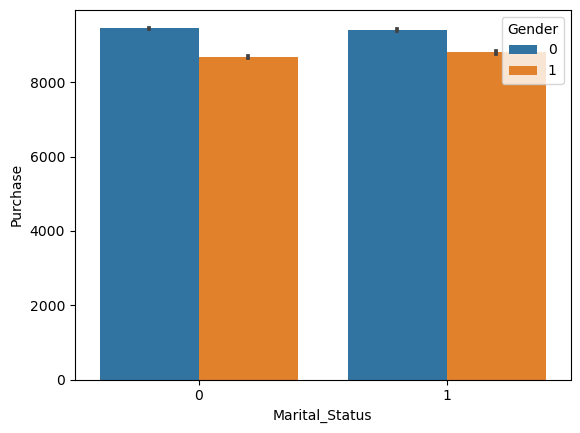

In [25]:
sns.barplot(y = 'Purchase',x = 'Marital_Status',hue = 'Gender', data = df)

# Married or unmarried, men won't stop shopping

<Axes: xlabel='Product_Category_1', ylabel='count'>

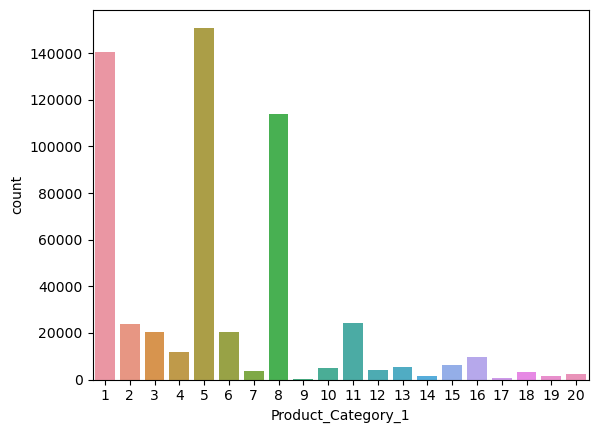

In [38]:
sns.countplot(data = df, x = 'Product_Category_1')

# Label 5 in 'Product_Category_1' has the highest sales

# Train_Test_Split

In [40]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.iloc[:, :-1]
y = df[['Purchase']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)

# train test split

# Standard Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scalar = StandardScaler()
scalar.fit(X_train)
scalar.transform(X_train)
scalar.transform(X_test)

array([[-0.57183532,  1.84816694,  1.67519074, ..., -1.11881282,
        -0.76132725,  1.9496217 ],
       [ 1.74875521,  0.37160547,  0.44834212, ..., -1.11881282,
         1.33005151,  1.9496217 ],
       [ 1.74875521,  0.37160547, -1.23857472, ...,  0.65996761,
         1.33005151, -0.6134813 ],
       ...,
       [-0.57183532,  0.37160547, -0.47179434, ..., -0.10236686,
        -1.08307783, -0.6134813 ],
       [-0.57183532,  0.37160547, -1.08521865, ...,  1.42230207,
        -1.08307783, -0.6134813 ],
       [ 1.74875521,  0.37160547, -0.31843826, ..., -1.11881282,
         1.4909268 , -0.6134813 ]])

In [58]:
scaled_train = pd.DataFrame(scalar.transform(X_train), columns = X_train.columns)
scaled_test = pd.DataFrame(scalar.transform(X_test), columns = X_test.columns)

In [59]:
scaled_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,-0.571835,0.371605,-0.165082,-0.056032,-0.666546,-0.833796,0.659968,-1.083078,-0.613481
1,-0.571835,-1.843237,0.294986,1.258940,-1.442072,-0.833796,-0.864701,0.203924,2.270010
2,-0.571835,-0.366675,0.601698,-1.371003,-0.666546,-0.833796,-0.102367,0.203924,-0.613481
3,-0.571835,-0.366675,1.368479,-0.056032,0.884505,-0.833796,-0.102367,-0.117826,-0.613481
4,-0.571835,1.848167,1.368479,-0.056032,-0.666546,1.199334,-1.118813,1.490927,-0.613481
...,...,...,...,...,...,...,...,...,...
412546,-0.571835,1.109886,1.368479,1.258940,0.108979,-0.833796,-0.102367,-1.083078,-0.613481
412547,-0.571835,-0.366675,0.908410,1.258940,0.108979,1.199334,-0.102367,-1.083078,-0.613481
412548,1.748755,-1.104956,-1.085219,-0.056032,-0.666546,-0.833796,-0.102367,-1.083078,-0.613481
412549,1.748755,-1.104956,-0.625150,-0.056032,0.108979,-0.833796,0.659968,1.169176,-0.613481


In [60]:
scaled_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,-0.571835,1.848167,1.675191,1.258940,0.884505,-0.833796,-1.118813,-0.761327,1.949622
1,1.748755,0.371605,0.448342,-0.056032,-0.666546,-0.833796,-1.118813,1.330052,1.949622
2,1.748755,0.371605,-1.238575,-1.371003,0.108979,1.199334,0.659968,1.330052,-0.613481
3,-0.571835,-1.104956,-0.625150,-1.371003,0.884505,-0.833796,-1.118813,1.330052,1.949622
4,-0.571835,-1.104956,-0.625150,-0.056032,-1.442072,-0.833796,0.151745,0.203924,1.949622
...,...,...,...,...,...,...,...,...,...
137512,1.748755,0.371605,0.908410,-0.056032,-0.666546,-0.833796,-1.118813,-0.761327,1.629234
137513,1.748755,1.848167,-1.238575,1.258940,1.660031,-0.833796,-0.102367,-1.083078,-0.613481
137514,-0.571835,0.371605,-0.471794,-1.371003,-0.666546,1.199334,-0.102367,-1.083078,-0.613481
137515,-0.571835,0.371605,-1.085219,1.258940,0.884505,-0.833796,1.422302,-1.083078,-0.613481
